# Numpy

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*.

This is adapted from Thomas Hauser's (thomas.hauser@colorado.edu) notebook.

## Outline

- Array creation
- Array-generating functions
    - `random`
    - `arange`, `linspace`, `logspace`
    - `zeros`, `ones`
- File IO
- Indexing and slicing
- Filtering
- Operations
- Broadcasting

## Further reading
 
* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## `array`

Arrays can be created from

* lists or tuples
* using functions 
* reading data from files

In [4]:
vector = np.array([1.0, 3.3, 4.1, 5.3, 6.1])
vector

array([ 1. ,  3.3,  4.1,  5.3,  6.1])

In [16]:
matrix = np.array([ [1, 1, 3], [8, 4, 5] ])
matrix

array([[1, 1, 3],
       [8, 4, 5]])

Arrays are of type `ndarray` that the `numpy` module provides.

In [14]:
type(vector)

numpy.ndarray

Arrays have shapes. This is a property of an array

In [30]:
np.shape(matrix)

(2, 3)

The number of elements in the array is available through the `ndarray.size` property

In [32]:
print(np.size(vector))

5


In [33]:
np.shape?

## Why user arrays?

* List are general, can hold different data types
* Numpy arrays are **statically typed** and **homogeneous**. 
* Numpy arrays are memory efficient.
* Fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays because of static type

In [8]:
print vector.dtype
print matrix.dtype

float64
int64


In [35]:
print vector[1]
print matrix[0,2]

3.3
3


In [46]:
matrix[0,] = 3.1
print matrix

[[3 3 3]
 [3 4 5]]


In [11]:
vector[1] = "string"

ValueError: could not convert string to float: string

In [47]:
matrix = np.array([[1, 2], [3, 4]])
print matrix

[[1 2]
 [3 4]]


## Using array-generating functions
 
For larger arrays it is inpractical to initialize the data manually, using explicit pythons lists. Instead we can use one of the many functions in `numpy` that generates arrays of different forms. Some of the more common are:

### `arange`

In [48]:
np.arange?

In [49]:
x = np.arange(1, 10, 0.25)
print x

[ 1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75  6.    6.25  6.5   6.75
  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75]


### `linspace`

In [50]:
print np.linspace(0, 10, 15)

[  0.           0.71428571   1.42857143   2.14285714   2.85714286
   3.57142857   4.28571429   5.           5.71428571   6.42857143
   7.14285714   7.85714286   8.57142857   9.28571429  10.        ]


### `logspace`

In [20]:
print np.logspace(0, 5, 10, base=np.e)

[   1.            1.742909      3.03773178    5.29449005    9.22781435
   16.08324067   28.03162489   48.85657127   85.15255772  148.4131591 ]


### `random`

In [59]:
from numpy import random
import matplotlib.pyplot as plt

Uniform random numbers ini [0,1]

In [84]:
random.rand(20)

array([ 0.66597554,  0.49583964,  0.87302588,  0.587885  ,  0.28541109,
        0.89801523,  0.61161299,  0.51332482,  0.53556356,  0.19044465,
        0.42074733,  0.23513746,  0.27469072,  0.18901258,  0.36087075,
        0.8166144 ,  0.17319869,  0.60530584,  0.85225943,  0.09809099])

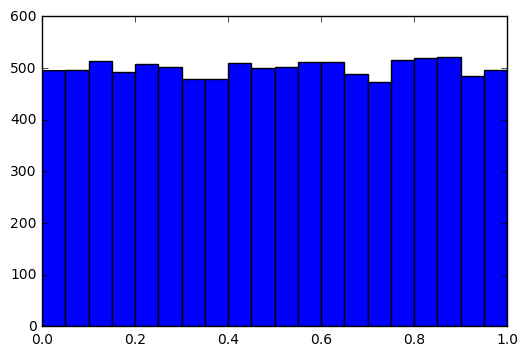

ERROR:root:Line magic function `%plt.show` not found.


In [83]:
plt.show(plt.hist(random.rand(10000), 20))
%plt.show(plt.hist(random.normal(10, 2, size=10000), 200))

In [77]:
random.normal?

In [25]:
print random.rand(5,5)

[[ 0.18842456  0.2844669   0.3283944   0.92495206  0.66080992]
 [ 0.90491714  0.68345955  0.91999688  0.99640494  0.99137612]
 [ 0.77458448  0.48159623  0.23030313  0.68213013  0.74965713]
 [ 0.91743691  0.98835904  0.47122426  0.97078022  0.52150299]
 [ 0.06372123  0.45980153  0.08330244  0.66785483  0.95637734]]


Standard normal distributed random numbers

In [26]:
print random.randn(5,5)

[[ 1.14673253 -1.31179515  1.59015704  0.92983869  0.0505715 ]
 [ 1.44292422  0.66492324 -1.08986953  0.58808022 -1.04480329]
 [-0.77114293 -0.05162271  0.29795872 -0.3617872   0.88753978]
 [-0.09947239 -0.38051489  1.58645974 -1.08558224 -0.86117613]
 [ 0.02637545 -0.26968426  0.6613986   0.43848938  1.66857784]]


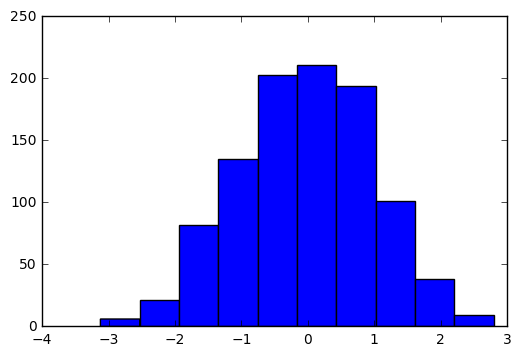

In [28]:
plt.show(plt.hist(random.randn(1000)))

There are several useful `np.random` functions.

    seed, permutation, shuffle, randn, rand

### `zeros`, `ones`

In [29]:
print np.zeros(10)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [30]:
print np.zeros((3,3))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [31]:
print np.ones((3,3))

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


## Reading and writing data with `numpy`

In [4]:
import os
filename = os.path.join('./Data/iris.csv')

In [35]:
!head data/iris.csv

sepal_length,sepal_width,pedal_length,pedal_width,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


### Reading

In [39]:
iris = np.loadtxt(filename, delimiter=',', usecols=(0,1,2,3), skiprows=1)
print iris[0:5:,] #Talk about slicing soon

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


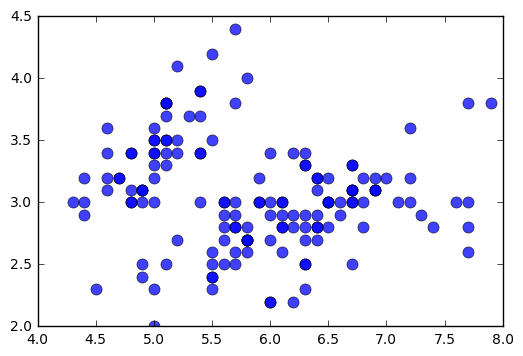

In [41]:
sl, sw = np.loadtxt(filename, delimiter=',', usecols=(0,1), skiprows=1, unpack=True)
plt.show(plt.plot(sl,sw, 'o', markersize=8, alpha=0.75))

Missing data? Use `np.genfromtxt`.

In [5]:
iris = np.genfromtxt(filename, delimiter=',', usecols=(0,1,2,3), skip_header=1)

Don't forget to ask for help: `help(np.loadtxt)` and `help(np.genfromtxt)`.

### Writing

In [39]:
filename = os.path.join('data','iris.txt')
np.savetxt(filename, iris)
!head $filename

5.099999999999999645e+00 3.500000000000000000e+00 1.399999999999999911e+00 2.000000000000000111e-01
4.900000000000000355e+00 3.000000000000000000e+00 1.399999999999999911e+00 2.000000000000000111e-01
4.700000000000000178e+00 3.200000000000000178e+00 1.300000000000000044e+00 2.000000000000000111e-01
4.599999999999999645e+00 3.100000000000000089e+00 1.500000000000000000e+00 2.000000000000000111e-01
5.000000000000000000e+00 3.600000000000000089e+00 1.399999999999999911e+00 2.000000000000000111e-01
5.400000000000000355e+00 3.899999999999999911e+00 1.699999999999999956e+00 4.000000000000000222e-01
4.599999999999999645e+00 3.399999999999999911e+00 1.399999999999999911e+00 2.999999999999999889e-01
5.000000000000000000e+00 3.399999999999999911e+00 1.500000000000000000e+00 2.000000000000000111e-01
4.400000000000000355e+00 2.899999999999999911e+00 1.399999999999999911e+00 2.000000000000000111e-01
4.900000000000000355e+00 3.100000000000000089e+00 1.500000000000000000e+00 1.000000000000000056e-01


In [40]:
np.savetxt(filename, iris, fmt='%.2f', delimiter='\t')
!head $filename

5.10	3.50	1.40	0.20
4.90	3.00	1.40	0.20
4.70	3.20	1.30	0.20
4.60	3.10	1.50	0.20
5.00	3.60	1.40	0.20
5.40	3.90	1.70	0.40
4.60	3.40	1.40	0.30
5.00	3.40	1.50	0.20
4.40	2.90	1.40	0.20
4.90	3.10	1.50	0.10


`help(np.savetxt)`

##Indexing and slicing

Index slicing is the technical name for the syntax 

    container[lower:upper:step]
    
to extract part of an array.

We can omit any of the three parameters in `container[lower:upper:step]`.

In [41]:
x = np.arange(1, 20, 1)
print x

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [42]:
print x[0:10]

[ 1  2  3  4  5  6  7  8  9 10]


In [43]:
print x[:10]

[ 1  2  3  4  5  6  7  8  9 10]


In [44]:
print x[::2]

[ 1  3  5  7  9 11 13 15 17 19]


In [45]:
print x[1::2]

[ 2  4  6  8 10 12 14 16 18]


Last element

In [46]:
print x[-1:]

[19]


Last 10 elements

In [47]:
print x[-10:]

[10 11 12 13 14 15 16 17 18 19]


### Fancy Indexing

In [48]:
matrix = np.zeros((5,5), dtype='int64') # float64, int64, str, bool

for i in xrange(5):
    matrix[i] = i
    
print matrix

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [52]:
print matrix[[0,2,4]]

[[0 0 0 0 0]
 [2 2 2 2 2]
 [4 4 4 4 4]]


##Filtering

In [53]:
print x > 10

[False False False False False False False False False False  True  True
  True  True  True  True  True  True  True]


In [54]:
print x[x > 10]

[11 12 13 14 15 16 17 18 19]


In [55]:
mask = (5 < x) * (x < 10)
print mask

[False False False False False  True  True  True  True False False False
 False False False False False False False]


In [56]:
print x[mask]

[6 7 8 9]


##Operations

### Scalar

Several built-in functions *unary* functions (takes one argument):

        abs, fabs, sqrt, exp, square, log, ceil, floor

In [57]:
x = np.arange(-5,5)
print np.square(x)

[25 16  9  4  1  0  1  4  9 16]


*Binary* functions:
    
        add, subtract, multiply, divide, power, maximum, minimum, greater, less

In [59]:
x = np.arange(-5,5)
y = np.square(x)

print np.minimum(x,y)
print np.add(x,y)

[-5 -4 -3 -2 -1  0  1  2  3  4]
[20 12  6  2  0  0  2  6 12 20]


### Statistic

Methods:

        sum, mean, std, var, min, max, argmin, argmax, cumsum, cumprod

In [63]:
print np.cumsum(y)
print y
print np.min(y)
print np.argmin(y)

[25 41 50 54 55 55 56 60 69 85]
[25 16  9  4  1  0  1  4  9 16]
0
5


### Linear Algebra

Methods:
    
        dot, inv, diag, trace, eig, det, qr, svd, solve

In [64]:
a = np.arange(0,25).reshape((5,5))
print a

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [65]:
b = a*a
print b

[[  0   1   4   9  16]
 [ 25  36  49  64  81]
 [100 121 144 169 196]
 [225 256 289 324 361]
 [400 441 484 529 576]]


In [66]:
b = np.dot(a,a.T)
print b

[[  30   80  130  180  230]
 [  80  255  430  605  780]
 [ 130  430  730 1030 1330]
 [ 180  605 1030 1455 1880]
 [ 230  780 1330 1880 2430]]


## Broadcasting

Arithmetic between `array`s of differnt shapes.

In [67]:
vec = np.arange(1,10)
print vec * 5

[ 5 10 15 20 25 30 35 40 45]


The value `5` was broadcasted to the elements of vec.  Here's a more extensive example:

### Harder example

Find the distance from the mean of the set to every point?

In [68]:
a = np.random.randn(400,2)
m = a.mean(0)
print m, m.shape

[ 0.06048821  0.00785641] (2,)


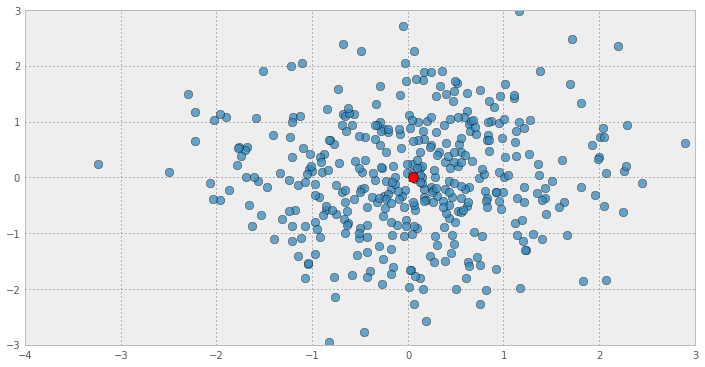

In [69]:
plt.plot(a[:,0], a[:,1], 'o', markersize=8, alpha=0.75)
plt.plot(m[0], m[1], 'ro', markersize=10)
plt.show()

Euclidean distance

$$d = \sqrt{ \sum (x_i - y_i)^2 }$$

In [70]:
sq = np.square(a - m)
print sq.shape

(400, 2)


The mean `a.mean(0)` was broadcast to every row in our matrix `a`.  Now we compute the column sum of `sq`.

In [71]:
ssq = sq.sum(1)
print ssq.shape

(400,)


Now take the `sqrt`.

In [72]:
dist = np.sqrt(ssq)
print dist.shape

(400,)


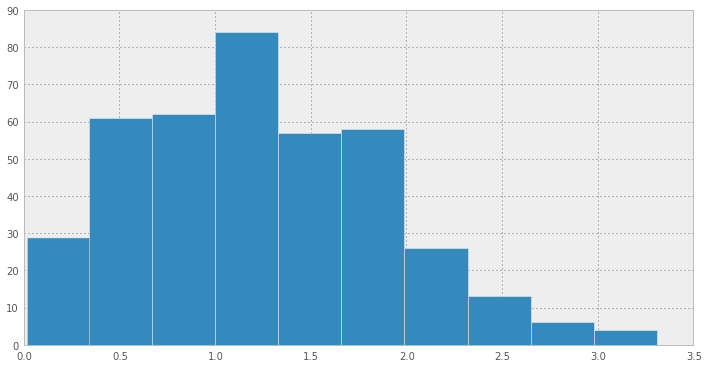

In [73]:
show(plt.hist(dist))